# Introduction To Data Science In Class HW10/02 

In [320]:
# This tidy data tutorial is doing the replication of the http://tomaugspurger.github.io/modern-5-tidy.html
# Since the html file data that basketball-reference.com has changed, for NBA_2016_games.html only shows the October games instead all 2016 seasons, result may not be the same as the reference

# To show graphs in jupyter notebook using %matplotlib inline 
%matplotlib inline 
# Import numby, pandas, seaborn, matplotlib.pyplot libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Check the os envrionment and set to modern_pandas_epub
if int(os.environ.get("MODERN_PANDAS_EPUB", 0)):
    import prep # noqa

# Set up Pandas for display max rows = 10
pd.options.display.max_rows = 10

# Set up Seaborn style = ticks and context = talk
sns.set(style='ticks', context='talk')

In [321]:
# Set up the directory for nba.csv to put in and name it as fp
fp = '/Users/ChienMingHuang/Desktop/Rutgers MIT Course/bos.csv'

# This if else is make sure that if in the directory without nba.csv file, then we will use pandas to read the nba html files for tables
# Let games = tables[0]
# And for games.to_csv to write the fp into csv file
# Else is that if exists fp, then pandas just needs to read fp csv file
if not os.path.exists(fp):
    tables = pd.read_html("https://www.baseball-reference.com/teams/BOS/2016-schedule-scores.shtml#team_schedule::none")
    games = tables[0]
    games.to_csv(fp)
else:
    games = pd.read_csv(fp)

# Show the head rows for games by .head()   
games.head()

,Unnamed: 0,Gm#,Date,Unnamed: 2,Tm,,Opp,W/L,R,RA,...,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak
0,0,1,"Tuesday, Apr 5",boxscore,BOS,@,CLE,W,6,2,...,1-0,1,Tied,Price,Kluber,NaN,3:13,D,34493,+
1,1,2,"Wednesday, Apr 6",boxscore,BOS,@,CLE,L,6,7,...,1-1,2,1.0,McAllister,Tazawa,Allen,3:29,N,10298,-
2,2,3,"Friday, Apr 8",boxscore,BOS,@,TOR,W,8,7,...,2-1,2,1.5,Barnes,Storen,Kimbrel,3:24,N,48871,+
3,3,4,"Saturday, Apr 9",boxscore,BOS,@,TOR,W,8,4,...,3-1,2,1.0,Porcello,Dickey,NaN,2:48,D,47138,++
4,4,5,"Sunday, Apr 10",boxscore,BOS,@,TOR,L,0,3,...,3-2,2,2.0,Estrada,Wright,Osuna,2:27,D,46158,-


In [322]:
# Dropna specific data with NA values using .dropna() for 'Unnamed:2' this column to remove the "Month headers" that slipped into the table.
games= games.dropna(subset=['Unnamed: 2'])

# Show the tail rows for games by .tail() to check all Monthly headers are removed
games.tail()

,Unnamed: 0,Gm#,Date,Unnamed: 2,Tm,,Opp,W/L,R,RA,...,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak
162,162,158,"Wednesday, Sep 28",boxscore,BOS,@,NYY,L-wo,3,5,...,92-66,1,up 5.0,Pazos,Kimbrel,NaN,3:28,N,35520,--
163,163,159,"Thursday, Sep 29",boxscore,BOS,@,NYY,L,1,5,...,92-67,1,up 5.0,Sabathia,Owens,NaN,3:17,N,41597,---
164,164,160,"Friday, Sep 30",boxscore,BOS,NaN,TOR,W,5,3,...,93-67,1,up 5.0,Ziegler,Biagini,Kimbrel,3:25,N,37661,+
166,166,161,"Saturday, Oct 1",boxscore,BOS,NaN,TOR,L,3,4,...,93-68,1,up 5.0,Osuna,Kimbrel,NaN,3:29,N,37396,-
167,167,162,"Sunday, Oct 2",boxscore,BOS,NaN,TOR,L,1,2,...,93-69,1,up 4.0,Sanchez,Ziegler,Osuna,3:14,D,36787,--


In [323]:
# To replace or modify game['Date'] for later fit in panda to_datetime 
# 1st have to renaming the date that exist two games with naming Wednesday, May 18 (1) and  Wednesday, May 18 (2) to only the Wednesday, May 18 exists.
games['Date']= games['Date'].replace(['Wednesday, May 18 (1)', 'Wednesday, May 18 (2)'], 'Wednesday, May 18')

# 2ne have to adjust the object Date to put the year= 2016 for later fit in panda to_datetime()
games['Date']= games['Date']+ ', 2016'
games['Date']

0         Tuesday, Apr 5, 2016
1       Wednesday, Apr 6, 2016
2          Friday, Apr 8, 2016
3        Saturday, Apr 9, 2016
4         Sunday, Apr 10, 2016
                ...           
162    Wednesday, Sep 28, 2016
163     Thursday, Sep 29, 2016
164       Friday, Sep 30, 2016
166      Saturday, Oct 1, 2016
167        Sunday, Oct 2, 2016
Name: Date, Length: 162, dtype: object

In [324]:
# Set up column_names and give every attributes their description
column_names = {'Gm#': 'gmnumber','Date': 'date', 'Unamed: 2': 'boxscore',
                'Tm': 'home_team', 'Opp': 'away_team', 'W/L': 'W/L record',
                'R': 'home_points', 'RA': 'away_points', 'Inn': 'morethan9innings', 
                'W-L': 'overall_W/L', 'Rank': 'home_team_rank',
                'GB': 'games_back', 'Win': 'win_pitcher', 'loss': 'loss_pitcher',
                'Save': 'save_pitcher', 'Time': 'durationtime', 'D/N': 'dayornight',
                'Attendance':'attendance_number', 'Streak': 'winlosestreak'}

# Use the rename for the columns to rename the games columns
# For [['date', ...]] just show this five columns
# Assign the date use lambda function and give the date its format = '%A, %b %d, %Y'
# %A: all Weekday as locale’s full name, %b: Month as locale’s abbreviated name, %d: Day of the month as a zero-padded decimal number, %Y: Year with century as a decimal number 
# For set_index, using date, the original index as index and for append= TRUE means whether to append columns to existing index
# .Rename_axis for renaming the axis name as game_id and date
# .Sort_index for using the date for sorting

games = (games.rename(columns=column_names)
         [['date', 'away_team', 'away_points', 'home_team', 'home_points']]
         .assign(date=lambda x: pd.to_datetime(x['date'], format='%A, %b %d, %Y'))
         .set_index('date', append=True)
         .rename_axis(["game_id", "date"])
         .sort_index()
        )

# Show the head rows for games by .head() 
games.head()

,,away_team,away_points,home_team,home_points
game_id,date,,,,
0,2016-04-05,CLE,2,BOS,6
1,2016-04-06,CLE,7,BOS,6
2,2016-04-08,TOR,7,BOS,8
3,2016-04-09,TOR,4,BOS,8
4,2016-04-10,TOR,3,BOS,0


In [325]:
# For creating the observation (team, game)
# Pandas melt function will melt away_team and home_team down into one column with multiple rows
# id_vars uses game_id and date and keep this in the tidy, and value varialbe use away_team and home_team
# value_name = team means will show what team is for the value
tidy = pd.melt(games.reset_index(),
               id_vars=['game_id', 'date'], value_vars=['away_team', 'home_team'],
               value_name='team')

# Show the head rows for tidy by .head() 
tidy.head()

,game_id,date,variable,team
0,0,2016-04-05,away_team,CLE
1,1,2016-04-06,away_team,CLE
2,2,2016-04-08,away_team,TOR
3,3,2016-04-09,away_team,TOR
4,4,2016-04-10,away_team,TOR


In [326]:
# Use .groupby to do the grouping of team
# Calculate the days of rest between games using diff().dt.days -1 to opearte the(date of today's game- date od previous game -1)
# For each team... get number of days between games
tidy.groupby('team')['date'].diff().dt.days - 1

0      NaN
1      0.0
2      NaN
3      0.0
4      0.0
      ... 
319    0.0
320    0.0
321    0.0
322    0.0
323    0.0
Name: date, Length: 324, dtype: float64

In [327]:
# Let tidy['rest'] equals the previous stuffs and do the date sort using .sort_values('date')
tidy['rest'] = tidy.sort_values('date').groupby('team').date.diff().dt.days - 1

# Show the head rows for tidy data by .head() and use .dropna() to drop NA values 
tidy.dropna().head()

,game_id,date,variable,team,rest
1,1,2016-04-06,away_team,CLE,0.0
3,3,2016-04-09,away_team,TOR,0.0
4,4,2016-04-10,away_team,TOR,0.0
6,6,2016-04-12,away_team,BAL,0.0
7,7,2016-04-13,away_team,BAL,0.0


In [328]:
# Use .pivot_table to do a pivot table for by_game
# For pivot_table, data= tidy, and columns to aggreate is 'rest' using values, and using 'game_id' and 'date' as index
# Later using the columnes to tell the data type is 'variable'
# Use .rename function for renaming the column from 'away_team' to 'away_rest' and from 'home_team' to 'home_rest'
by_game = (pd.pivot_table(tidy, values='rest',
                          index=['game_id', 'date'],
                          columns='variable')
             .rename(columns={'away_team': 'away_rest',
                              'home_team': 'home_rest'}))
# Use .concat function to concatenate games and by_game, and axis= 1 means concatenate the columns
df = pd.concat([games, by_game], axis=1)

# Show the head rows for df data by .head() and use .dropna() to drop NA values 
df.dropna().head()

,,away_team,away_points,home_team,home_points,away_rest,home_rest
game_id,date,,,,,,
1,2016-04-06,CLE,7,BOS,6,0.0,0.0
3,2016-04-09,TOR,4,BOS,8,0.0,0.0
4,2016-04-10,TOR,3,BOS,0,0.0,0.0
6,2016-04-12,BAL,9,BOS,5,0.0,0.0
7,2016-04-13,BAL,2,BOS,4,0.0,0.0


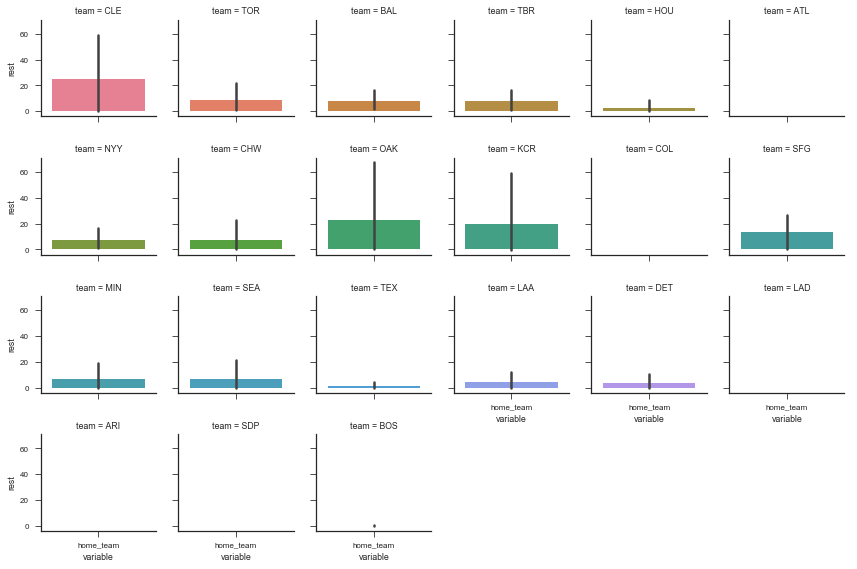

In [329]:
# In this part, we use seaborn to do some data visualization
# Use seaborn .set function to set the seaborn visualization style as ticks and context as paper
sns.set(style='ticks', context='paper')

# Use the .FacetGrid function to link panda dataframe to a matplotlib figure with below structure 
# Data = tidy, col= 'team' means for the plot column side is 'team', col_wrap= 6 means that wrap the column variable at 6 this width. so in the picture will show six some plots in one rows
# hue= 'team' means that different team will different color in the plot and size= 2 means will be 2 inches height of each facet
g = sns.FacetGrid(tidy, col='team', col_wrap=6, hue='team', size=2)

# Use .map function to apply seaborn bar plot using .barplot, and set the input as variable and rest to get the plots
g.map(sns.barplot, 'variable', 'rest');

In [331]:
# To define de['home_win'] using the definition that df['home_points'] is larger than df['away_points'] to get the result
df['home_win'] = df['home_points'] > df['away_points']

# To define df['rest_spread'] using the definition that df['home_rest'] minus df['away_rest'] to get the result
df['rest_spread'] = df['home_rest'] - df['away_rest']

# Show the head rows for df data by .head() and use .dropna() to drop NA values 
df.dropna().head()

,,away_team,away_points,home_team,home_points,away_rest,home_rest,home_win,rest_spread
game_id,date,,,,,,,,
1,2016-04-06,CLE,7,BOS,6,0.0,0.0,False,0.0
3,2016-04-09,TOR,4,BOS,8,0.0,0.0,True,0.0
4,2016-04-10,TOR,3,BOS,0,0.0,0.0,False,0.0
6,2016-04-12,BAL,9,BOS,5,0.0,0.0,False,0.0
7,2016-04-13,BAL,2,BOS,4,0.0,0.0,True,0.0


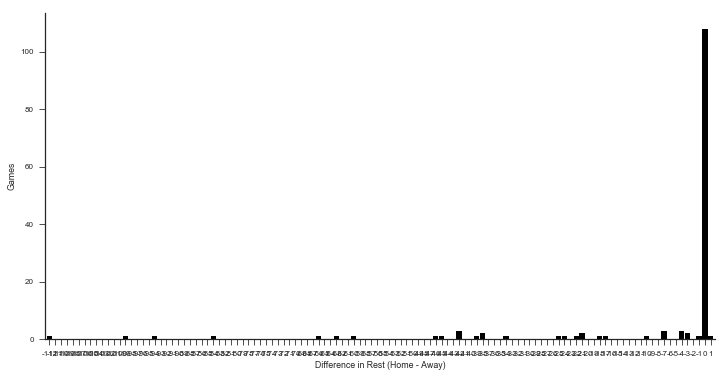

In [332]:
# Let delta equals the result that home_rest in the by_game minus the away_rest in the by_game and use .dropna() to drop NA values and .astype function for set the data type as interger
delta = (by_game.home_rest - by_game.away_rest).dropna().astype(int)

# Let ax equals the delta value_count bar plot
# Use .reindex function with .arrange function for the interval between delta.min() and delta.max() + 1, and use fill_values= 0 to fill the NA values as 0
# Use .sort_index function to do the sorting for previous interval
# Use .plot function to do the bar plot by kind= 'bar', and give color as black for color='k' and give the width= 0.9
# Also rot= 0 means to rotate the xticks and figsize= (12, 6) means give the width= 12 inches and height= 6 inches for the tuple
ax = (delta.value_counts()
    .reindex(np.arange(delta.min(), delta.max() + 1), fill_value=0)
    .sort_index()
    .plot(kind='bar', color='k', width=.9, rot=0, figsize=(12, 6))
)

# Use .despine function to remove the top and right spines from plot
sns.despine()

# Use .set function to set the xlabel='Difference in Rest (Home - Away)' and ylabel='Games'
ax.set(xlabel='Difference in Rest (Home - Away)', ylabel='Games');

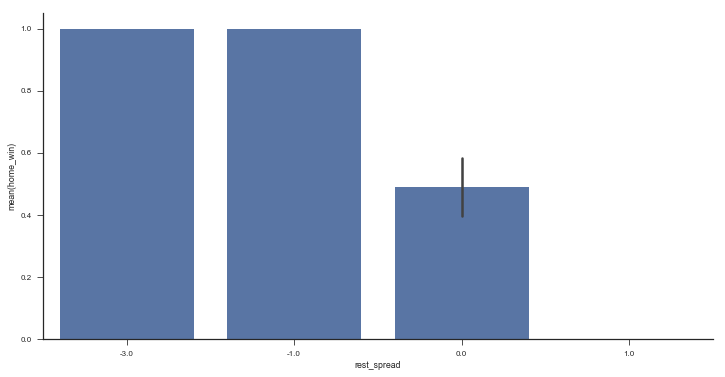

In [333]:
# Use .subplots function to a subplot for ax as give the figsize width= 12 inches and height= 6 inches
fig, ax = plt.subplots(figsize=(12, 6))

# Do a barplot for xlabel= rest_spread', ylabel='home_win', and put the data of the query result that fit in '-3 <= rest_spread <= 3' this range
# Also set up the color as '#4c72b0' this color and matplotlib axes ax= ax
sns.barplot(x='rest_spread', y='home_win', data=df.query('-3 <= rest_spread <= 3'),
            color='#4c72b0', ax=ax)

# Use .despine function to remove the top and right spines from plot
sns.despine()

# Reference
1. https://www.baseball-reference.com/teams/BOS/2016-schedule-scores.shtml#team_schedule::none
2. https://chrisalbon.com/python/pandas_dropping_column_and_rows.html
3. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html
4. https://chrisalbon.com/python/strings_to_datetime.html
5. http://strftime.org/